In [1]:
import sys
sys.path.append("../scripts/")
import os

import pandas as pd
from glob import glob
from matplotlib import pyplot as plt

import numpy as np

from read_data import fromcsv2df, distribution

In [2]:
def get_histogram(feature_name, h_min, h_max,
                 stack_list, weights_list, names, signal_values, signal_weights, signal_name, dens=False):
    
    fig = plt.figure(figsize=(10, 10))
    grid = plt.GridSpec(5, 2, hspace=0.25)
    his = fig.add_subplot(grid[:-1, :])
    
    plt.title("{}".format(feature_name))   
    plt.grid()
    
    
    n_signal, bin_edges_signal,patches_signal = plt.hist(signal_values, range=(hmin,hmax), 
             weights = signal_weights, bins=30,label=signal_name,fill=False,color="red", density=dens)
    #bin_centres = (bin_edges_back[:-1] + bin_edges_back[1:])/2.
    
    n_back, bin_edges_back, patches_back = plt.hist(stack_list, range=(hmin,hmax), 
                                                    weights = weights_list, bins=30,
             stacked=True,histtype =  'barstacked',label=names, density=dens)
    
    back_array = np.array(n_back)
    
    sum_back_per_bin = back_array.sum(axis=0)
    
    
    
    

    print("BACK", sum_back_per_bin)
   
    
    plt.legend(loc="upper right")
    plt.ylabel('Events')
    
    
    mask_0_back = sum_back_per_bin != 0
    


    if dens:
        if not os.path.exists('../histograms/density_true/'):
            os.makedirs('../histograms/density_true/')
        plotname = "../histograms/density_true/" + signal_name+ "_" +feature_name +".png"
    else:
        if not os.path.exists('../histograms/density_false/'):
            os.makedirs('../histograms/density_false/')
        plotname = "../histograms/density_false/" + signal_name+ "_" +feature_name +".png"
    plt.savefig(plotname)  
    plt.show()

In [3]:
def get_stacks(d,feature):
    stack_list = []
    weights_list = []
    names = []
    for samp, number in d.items():
        df_per_samp = df0[df0["sample"] == samp] #dataframe containing 
                                                 #only one kind of sample
        print(samp, number, df_per_samp["weight_column"].values.sum())
        stack_list.append(df_per_samp[feature].values)
        weights_list.append(df_per_samp["weight_column"].values)
        names.append(samp)
    return stack_list, weights_list, names

all_signal_m800_np_bg.csv m800_np
Index(['mumuSS', 'mumuOS', 'emu', 'ee', 'mll', 'drll', 'drjl1', 'drjl2',
       'drlmet', 'dphi_ll', 'dphi_llmet', 'dphi_fj12', 'dphi_fj13',
       'dphi_fj23', 'met', 'mt', 'mt2t', 'bveto', 'hthad_rj', 'hthad_fj',
       'htlep', 'fj1mass', 'fj2mass', 'fj1pt', 'fj2pt', 'nel', 'nmu', 'nj',
       'nfj', 'nfj_w', 'label', 'weight_column', 'sample'],
      dtype='object')
features ['bveto', 'mt2t', 'nfj_w', 'hthad_fj', 'mt', 'met', 'htlep']
::: bveto
df_signal.shape (16110, 3)
ttbar dileptonic 140040 124460.55
drell-yan 110904 88263.15685495628
ww+2j 24387 24648.67392354403
wz+2j 9324 8189.761994710995
ttbarZ 3659 2479.7042999999994
ttbarW 1308 641.0246399999999
wwz 879 219.50387999999998
www 758 256.2797999999999
wzz 359 28.91745
zz+1j 219 163.51410872097975
zzz 166 4.341137142857143
BACK [1111458.95616698       0.               0.               0.
       0.               0.               0.               0.
       0.               0.               0.  

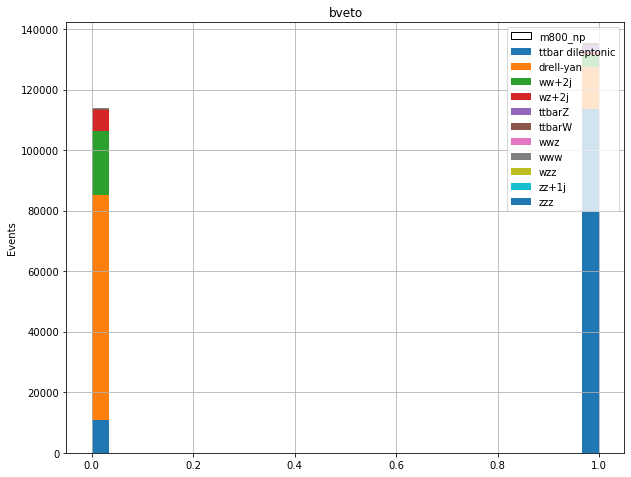

::: mt2t
df_signal.shape (16110, 3)
ttbar dileptonic 140040 124460.55
drell-yan 110904 88263.15685495628
ww+2j 24387 24648.67392354403
wz+2j 9324 8189.761994710995
ttbarZ 3659 2479.7042999999994
ttbarW 1308 641.0246399999999
wwz 879 219.50387999999998
www 758 256.2797999999999
wzz 359 28.91745
zz+1j 219 163.51410872097975
zzz 166 4.341137142857143
BACK [6.72516457e+04 6.96021306e+05 4.70653582e+05 4.89024492e+05
 3.41172397e+05 2.06865583e+05 1.15461670e+05 7.03686211e+04
 4.03041253e+04 2.59584701e+04 1.48004267e+04 9.43782296e+03
 5.17335553e+03 3.43208456e+03 2.60471260e+03 1.36827840e+03
 9.06783681e+02 5.92867806e+02 5.16578382e+02 2.15086363e+02
 2.07127844e+02 1.67128895e+02 7.16266692e+01 1.11427106e+02
 7.95851880e+00 7.95851880e+00 1.59170376e+01 7.95851880e+00
 2.38755564e+01 4.77511128e+01]


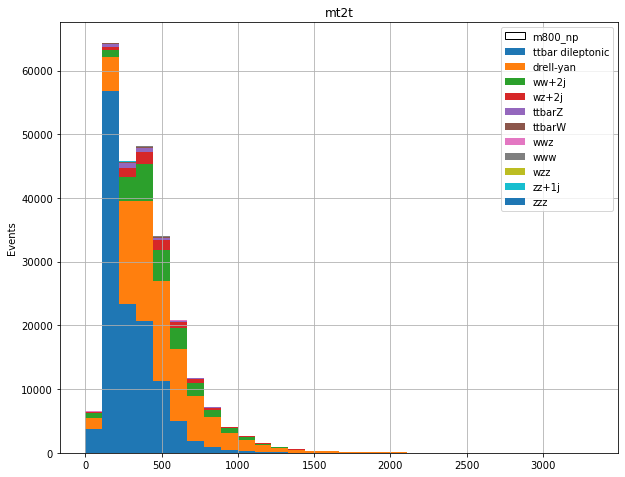

::: nfj_w
df_signal.shape (16110, 3)
ttbar dileptonic 140040 124460.55
drell-yan 110904 88263.15685495628
ww+2j 24387 24648.67392354403
wz+2j 9324 8189.761994710995
ttbarZ 3659 2479.7042999999994
ttbarW 1308 641.0246399999999
wwz 879 219.50387999999998
www 758 256.2797999999999
wzz 359 28.91745
zz+1j 219 163.51410872097975
zzz 166 4.341137142857143
BACK [1.81693912e+06 0.00000000e+00 0.00000000e+00 0.00000000e+00
 0.00000000e+00 0.00000000e+00 0.00000000e+00 6.73675142e+05
 0.00000000e+00 0.00000000e+00 0.00000000e+00 0.00000000e+00
 0.00000000e+00 0.00000000e+00 0.00000000e+00 7.00800431e+04
 0.00000000e+00 0.00000000e+00 0.00000000e+00 0.00000000e+00
 0.00000000e+00 0.00000000e+00 2.09728212e+03 0.00000000e+00
 0.00000000e+00 0.00000000e+00 0.00000000e+00 0.00000000e+00
 0.00000000e+00 7.02682282e+00]


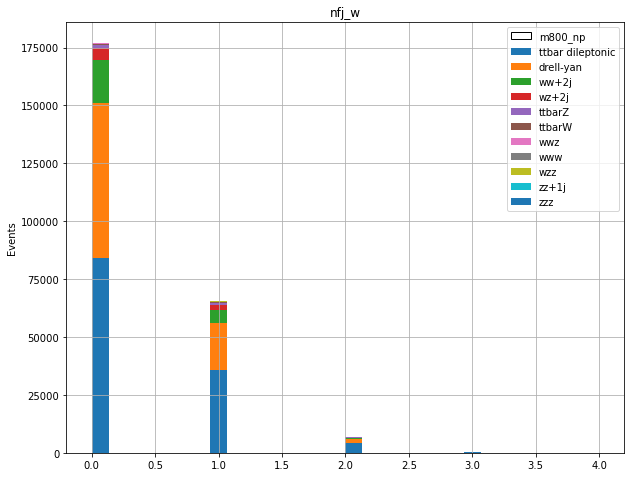

::: hthad_fj
df_signal.shape (16110, 3)
ttbar dileptonic 140040 124460.55
drell-yan 110904 88263.15685495628
ww+2j 24387 24648.67392354403
wz+2j 9324 8189.761994710995
ttbarZ 3659 2479.7042999999994
ttbarW 1308 641.0246399999999
wwz 879 219.50387999999998
www 758 256.2797999999999
wzz 359 28.91745
zz+1j 219 163.51410872097975
zzz 166 4.341137142857143
BACK [1.11893256e+05 3.82593945e+05 3.12301742e+05 5.41527993e+05
 4.60686001e+05 2.96620038e+05 1.86879507e+05 1.10727478e+05
 6.44256470e+04 3.76962120e+04 2.12778945e+04 1.45640676e+04
 7.92332731e+03 4.89135967e+03 3.40394928e+03 1.86142501e+03
 1.17449447e+03 7.85539088e+02 5.18511770e+02 3.34995248e+02
 1.86460087e+02 1.61652835e+02 1.13703210e+02 7.95930312e+01
 7.07028165e+01 2.29438604e+01 1.70550893e+01 3.41101786e+01
 1.59170376e+01 9.09657052e+00]


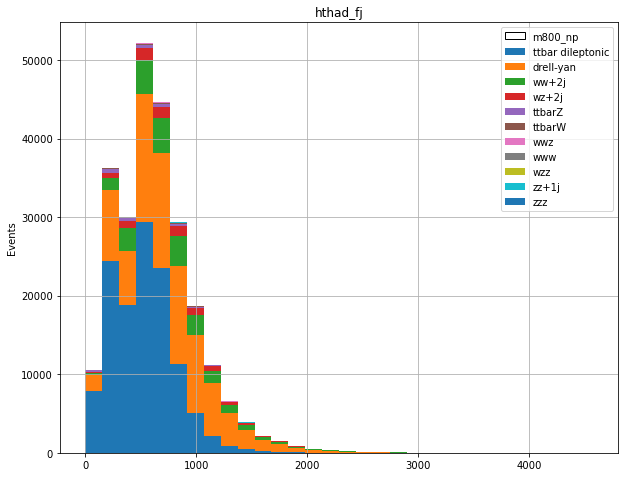

::: mt
df_signal.shape (16110, 3)
ttbar dileptonic 140040 124460.55
drell-yan 110904 88263.15685495628
ww+2j 24387 24648.67392354403
wz+2j 9324 8189.761994710995
ttbarZ 3659 2479.7042999999994
ttbarW 1308 641.0246399999999
wwz 879 219.50387999999998
www 758 256.2797999999999
wzz 359 28.91745
zz+1j 219 163.51410872097975
zzz 166 4.341137142857143
BACK [7.55739038e+05 7.02998940e+05 4.68813475e+05 2.85785337e+05
 1.60184091e+05 8.58685317e+04 4.62370891e+04 2.41477492e+04
 1.23475192e+04 7.16134078e+03 4.35651894e+03 2.80369263e+03
 2.07604728e+03 1.21242029e+03 8.09406615e+02 6.83127965e+02
 4.40470625e+02 3.40789446e+02 1.83577035e+02 1.05736792e+02
 1.19339964e+02 8.60503714e+01 4.46764457e+01 6.02618385e+01
 4.21792457e+01 4.77511128e+01 2.38755564e+01 2.38755564e+01
 3.97925940e+01 1.59170376e+01]


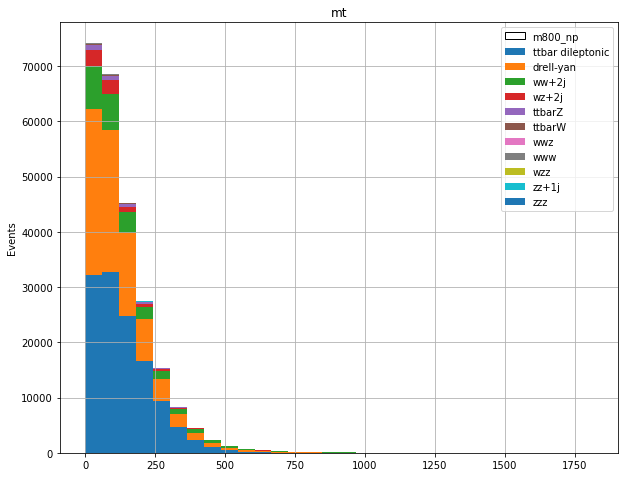

::: met
df_signal.shape (16110, 3)
ttbar dileptonic 140040 124460.55
drell-yan 110904 88263.15685495628
ww+2j 24387 24648.67392354403
wz+2j 9324 8189.761994710995
ttbarZ 3659 2479.7042999999994
ttbarW 1308 641.0246399999999
wwz 879 219.50387999999998
www 758 256.2797999999999
wzz 359 28.91745
zz+1j 219 163.51410872097975
zzz 166 4.341137142857143
BACK [1.06495423e+06 7.09061504e+05 3.70190501e+05 1.91262581e+05
 1.00270499e+05 5.28089655e+04 3.01243396e+04 1.72284644e+04
 1.02622218e+04 6.45934895e+03 3.55210347e+03 1.94386841e+03
 1.56720771e+03 9.83105749e+02 5.95040128e+02 4.87794707e+02
 3.54392975e+02 1.13181780e+02 1.35124411e+02 1.96966337e+02
 6.51389419e+01 4.22750532e+01 1.03451705e+01 7.02682282e+00
 0.00000000e+00 3.43165344e+01 7.02682282e+00 2.52199639e+01
 4.54828526e+01 1.03451705e+01]


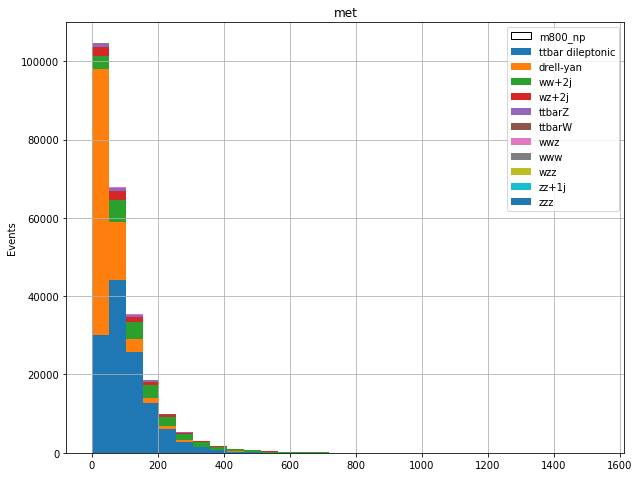

::: htlep
df_signal.shape (16110, 3)
ttbar dileptonic 140040 124460.55
drell-yan 110904 88263.15685495628
ww+2j 24387 24648.67392354403
wz+2j 9324 8189.761994710995
ttbarZ 3659 2479.7042999999994
ttbarW 1308 641.0246399999999
wwz 879 219.50387999999998
www 758 256.2797999999999
wzz 359 28.91745
zz+1j 219 163.51410872097975
zzz 166 4.341137142857143
BACK [5.53311684e+05 8.92305641e+05 4.72505511e+05 2.43868908e+05
 1.44544591e+05 9.94666728e+04 6.57904765e+04 3.77438030e+04
 2.15011285e+04 1.25009088e+04 7.19202261e+03 4.20127561e+03
 2.64155543e+03 1.77161472e+03 1.21406549e+03 7.60452550e+02
 4.53292857e+02 3.14223841e+02 2.78548158e+02 1.19377782e+02
 6.48062021e+01 7.97915437e+01 3.18340752e+01 4.88891645e+01
 3.18340752e+01 2.38755564e+01 7.95851880e+00 0.00000000e+00
 0.00000000e+00 2.38755564e+01]


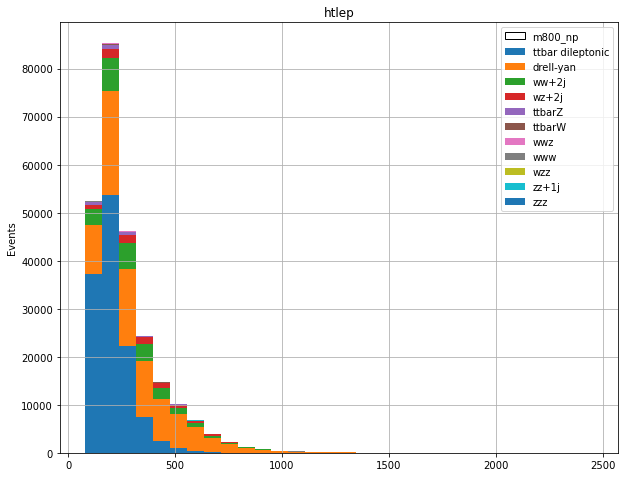

all_signal_m600_wp_bg.csv m600_wp
Index(['mumuSS', 'mumuOS', 'emu', 'ee', 'mll', 'drll', 'drjl1', 'drjl2',
       'drlmet', 'dphi_ll', 'dphi_llmet', 'dphi_fj12', 'dphi_fj13',
       'dphi_fj23', 'met', 'mt', 'mt2t', 'bveto', 'hthad_rj', 'hthad_fj',
       'htlep', 'fj1mass', 'fj2mass', 'fj1pt', 'fj2pt', 'nel', 'nmu', 'nj',
       'nfj', 'nfj_w', 'label', 'weight_column', 'sample'],
      dtype='object')
features ['bveto', 'mt2t', 'nfj_w', 'hthad_fj', 'mt', 'met', 'htlep']
::: bveto
df_signal.shape (9467, 3)
ttbar dileptonic 140040 124460.55
drell-yan 110904 88263.15685495628
ww+2j 24387 24648.67392354403
wz+2j 9324 8189.761994710995
ttbarZ 3659 2479.7042999999994
ttbarW 1308 641.0246399999999
wwz 879 219.50387999999998
www 758 256.2797999999999
wzz 359 28.91745
zz+1j 219 163.51410872097975
zzz 166 4.341137142857143
BACK [1111458.95616698       0.               0.               0.
       0.               0.               0.               0.
       0.               0.               0.   

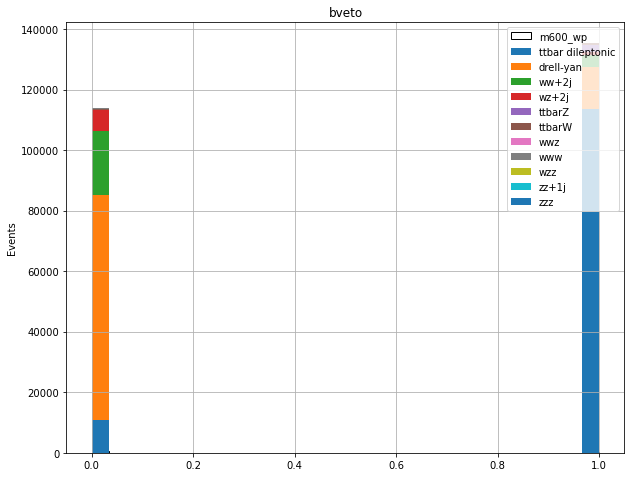

::: mt2t
df_signal.shape (9467, 3)
ttbar dileptonic 140040 124460.55
drell-yan 110904 88263.15685495628
ww+2j 24387 24648.67392354403
wz+2j 9324 8189.761994710995
ttbarZ 3659 2479.7042999999994
ttbarW 1308 641.0246399999999
wwz 879 219.50387999999998
www 758 256.2797999999999
wzz 359 28.91745
zz+1j 219 163.51410872097975
zzz 166 4.341137142857143
BACK [6.72516457e+04 6.96021306e+05 4.70653582e+05 4.89024492e+05
 3.41172397e+05 2.06865583e+05 1.15461670e+05 7.03686211e+04
 4.03041253e+04 2.59584701e+04 1.48004267e+04 9.43782296e+03
 5.17335553e+03 3.43208456e+03 2.60471260e+03 1.36827840e+03
 9.06783681e+02 5.92867806e+02 5.16578382e+02 2.15086363e+02
 2.07127844e+02 1.67128895e+02 7.16266692e+01 1.11427106e+02
 7.95851880e+00 7.95851880e+00 1.59170376e+01 7.95851880e+00
 2.38755564e+01 4.77511128e+01]


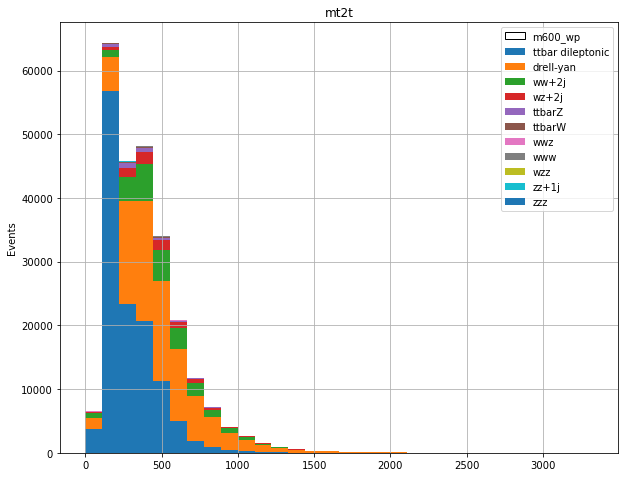

::: nfj_w
df_signal.shape (9467, 3)
ttbar dileptonic 140040 124460.55
drell-yan 110904 88263.15685495628
ww+2j 24387 24648.67392354403
wz+2j 9324 8189.761994710995
ttbarZ 3659 2479.7042999999994
ttbarW 1308 641.0246399999999
wwz 879 219.50387999999998
www 758 256.2797999999999
wzz 359 28.91745
zz+1j 219 163.51410872097975
zzz 166 4.341137142857143
BACK [1.81693912e+06 0.00000000e+00 0.00000000e+00 0.00000000e+00
 0.00000000e+00 0.00000000e+00 0.00000000e+00 6.73675142e+05
 0.00000000e+00 0.00000000e+00 0.00000000e+00 0.00000000e+00
 0.00000000e+00 0.00000000e+00 0.00000000e+00 7.00800431e+04
 0.00000000e+00 0.00000000e+00 0.00000000e+00 0.00000000e+00
 0.00000000e+00 0.00000000e+00 2.09728212e+03 0.00000000e+00
 0.00000000e+00 0.00000000e+00 0.00000000e+00 0.00000000e+00
 0.00000000e+00 7.02682282e+00]


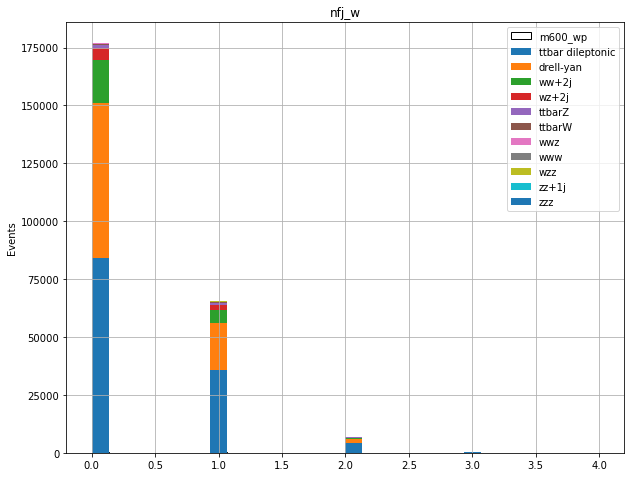

::: hthad_fj
df_signal.shape (9467, 3)
ttbar dileptonic 140040 124460.55
drell-yan 110904 88263.15685495628
ww+2j 24387 24648.67392354403
wz+2j 9324 8189.761994710995
ttbarZ 3659 2479.7042999999994
ttbarW 1308 641.0246399999999
wwz 879 219.50387999999998
www 758 256.2797999999999
wzz 359 28.91745
zz+1j 219 163.51410872097975
zzz 166 4.341137142857143
BACK [1.11893256e+05 3.82593945e+05 3.12301742e+05 5.41527993e+05
 4.60686001e+05 2.96620038e+05 1.86879507e+05 1.10727478e+05
 6.44256470e+04 3.76962120e+04 2.12778945e+04 1.45640676e+04
 7.92332731e+03 4.89135967e+03 3.40394928e+03 1.86142501e+03
 1.17449447e+03 7.85539088e+02 5.18511770e+02 3.34995248e+02
 1.86460087e+02 1.61652835e+02 1.13703210e+02 7.95930312e+01
 7.07028165e+01 2.29438604e+01 1.70550893e+01 3.41101786e+01
 1.59170376e+01 9.09657052e+00]


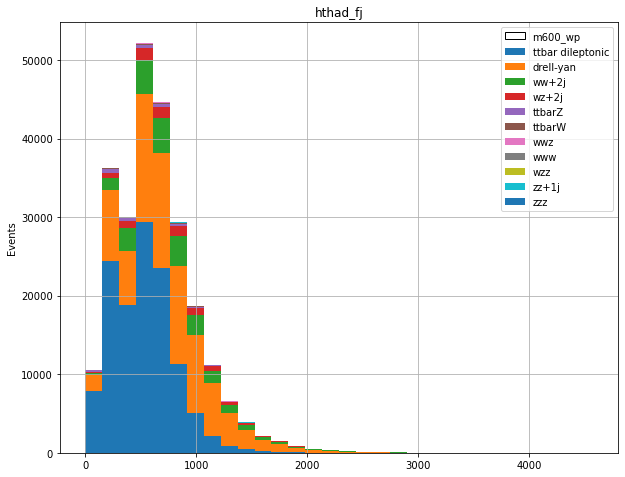

::: mt
df_signal.shape (9467, 3)
ttbar dileptonic 140040 124460.55
drell-yan 110904 88263.15685495628
ww+2j 24387 24648.67392354403
wz+2j 9324 8189.761994710995
ttbarZ 3659 2479.7042999999994
ttbarW 1308 641.0246399999999
wwz 879 219.50387999999998
www 758 256.2797999999999
wzz 359 28.91745
zz+1j 219 163.51410872097975
zzz 166 4.341137142857143
BACK [7.55739038e+05 7.02998940e+05 4.68813475e+05 2.85785337e+05
 1.60184091e+05 8.58685317e+04 4.62370891e+04 2.41477492e+04
 1.23475192e+04 7.16134078e+03 4.35651894e+03 2.80369263e+03
 2.07604728e+03 1.21242029e+03 8.09406615e+02 6.83127965e+02
 4.40470625e+02 3.40789446e+02 1.83577035e+02 1.05736792e+02
 1.19339964e+02 8.60503714e+01 4.46764457e+01 6.02618385e+01
 4.21792457e+01 4.77511128e+01 2.38755564e+01 2.38755564e+01
 3.97925940e+01 1.59170376e+01]


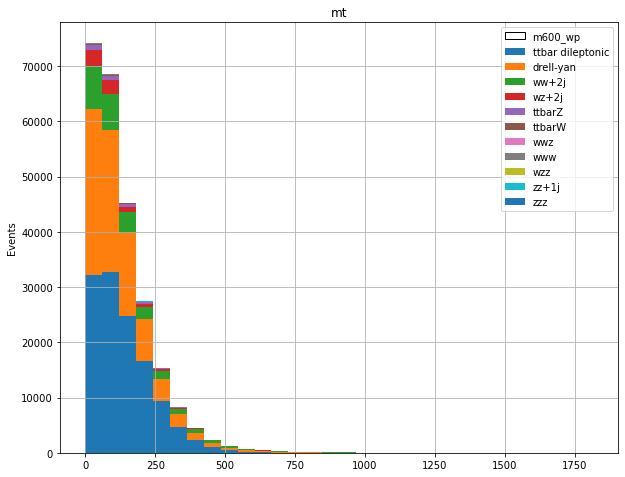

::: met
df_signal.shape (9467, 3)
ttbar dileptonic 140040 124460.55
drell-yan 110904 88263.15685495628
ww+2j 24387 24648.67392354403
wz+2j 9324 8189.761994710995
ttbarZ 3659 2479.7042999999994
ttbarW 1308 641.0246399999999
wwz 879 219.50387999999998
www 758 256.2797999999999
wzz 359 28.91745
zz+1j 219 163.51410872097975
zzz 166 4.341137142857143
BACK [1.06495423e+06 7.09061504e+05 3.70190501e+05 1.91262581e+05
 1.00270499e+05 5.28089655e+04 3.01243396e+04 1.72284644e+04
 1.02622218e+04 6.45934895e+03 3.55210347e+03 1.94386841e+03
 1.56720771e+03 9.83105749e+02 5.95040128e+02 4.87794707e+02
 3.54392975e+02 1.13181780e+02 1.35124411e+02 1.96966337e+02
 6.51389419e+01 4.22750532e+01 1.03451705e+01 7.02682282e+00
 0.00000000e+00 3.43165344e+01 7.02682282e+00 2.52199639e+01
 4.54828526e+01 1.03451705e+01]


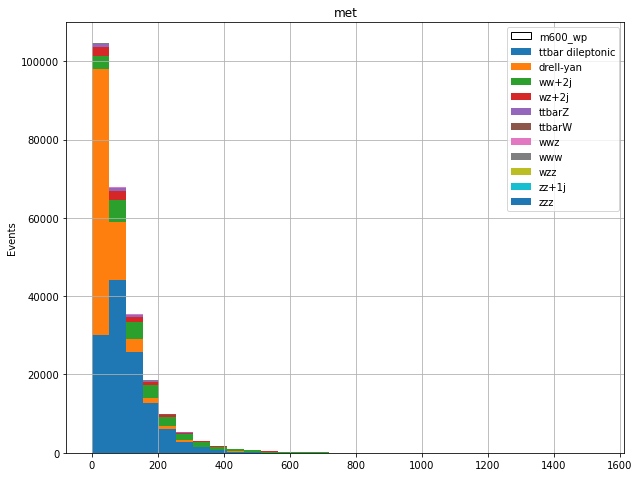

::: htlep
df_signal.shape (9467, 3)
ttbar dileptonic 140040 124460.55
drell-yan 110904 88263.15685495628
ww+2j 24387 24648.67392354403
wz+2j 9324 8189.761994710995
ttbarZ 3659 2479.7042999999994
ttbarW 1308 641.0246399999999
wwz 879 219.50387999999998
www 758 256.2797999999999
wzz 359 28.91745
zz+1j 219 163.51410872097975
zzz 166 4.341137142857143
BACK [5.53311684e+05 8.92305641e+05 4.72505511e+05 2.43868908e+05
 1.44544591e+05 9.94666728e+04 6.57904765e+04 3.77438030e+04
 2.15011285e+04 1.25009088e+04 7.19202261e+03 4.20127561e+03
 2.64155543e+03 1.77161472e+03 1.21406549e+03 7.60452550e+02
 4.53292857e+02 3.14223841e+02 2.78548158e+02 1.19377782e+02
 6.48062021e+01 7.97915437e+01 3.18340752e+01 4.88891645e+01
 3.18340752e+01 2.38755564e+01 7.95851880e+00 0.00000000e+00
 0.00000000e+00 2.38755564e+01]


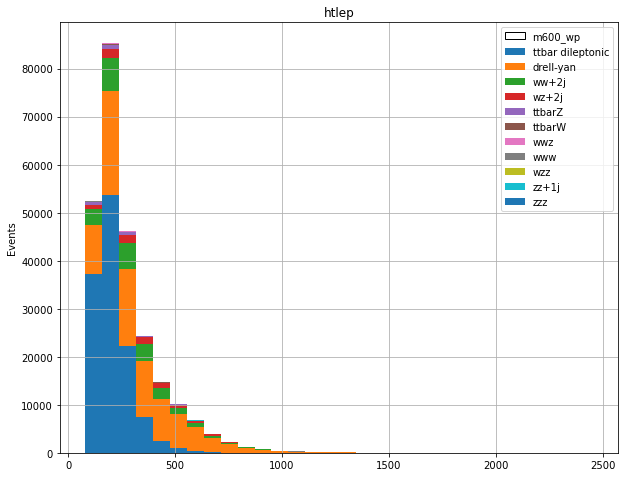

all_signal_m1000_wp_bg.csv m1000_wp
Index(['mumuSS', 'mumuOS', 'emu', 'ee', 'mll', 'drll', 'drjl1', 'drjl2',
       'drlmet', 'dphi_ll', 'dphi_llmet', 'dphi_fj12', 'dphi_fj13',
       'dphi_fj23', 'met', 'mt', 'mt2t', 'bveto', 'hthad_rj', 'hthad_fj',
       'htlep', 'fj1mass', 'fj2mass', 'fj1pt', 'fj2pt', 'nel', 'nmu', 'nj',
       'nfj', 'nfj_w', 'label', 'weight_column', 'sample'],
      dtype='object')
features ['bveto', 'mt2t', 'nfj_w', 'hthad_fj', 'mt', 'met', 'htlep']
::: bveto
df_signal.shape (17930, 3)
ttbar dileptonic 140040 124460.55
drell-yan 110904 88263.15685495628
ww+2j 24387 24648.67392354403
wz+2j 9324 8189.761994710995
ttbarZ 3659 2479.7042999999994
ttbarW 1308 641.0246399999999
wwz 879 219.50387999999998
www 758 256.2797999999999
wzz 359 28.91745
zz+1j 219 163.51410872097975
zzz 166 4.341137142857143
BACK [1111458.95616698       0.               0.               0.
       0.               0.               0.               0.
       0.               0.               0.

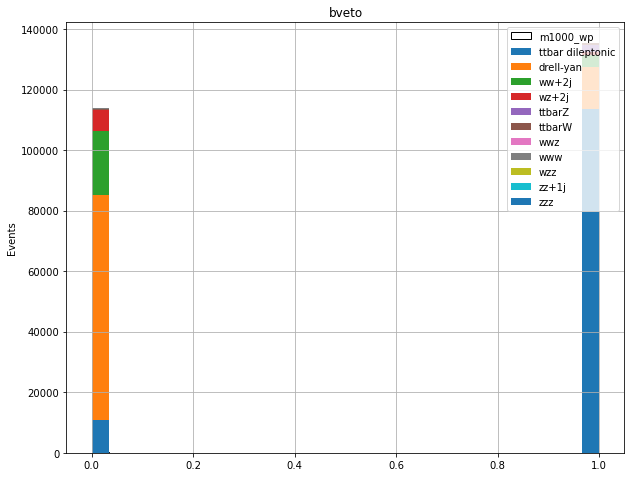

::: mt2t
df_signal.shape (17930, 3)
ttbar dileptonic 140040 124460.55
drell-yan 110904 88263.15685495628
ww+2j 24387 24648.67392354403
wz+2j 9324 8189.761994710995
ttbarZ 3659 2479.7042999999994
ttbarW 1308 641.0246399999999
wwz 879 219.50387999999998
www 758 256.2797999999999
wzz 359 28.91745
zz+1j 219 163.51410872097975
zzz 166 4.341137142857143
BACK [6.72516457e+04 6.96021306e+05 4.70653582e+05 4.89024492e+05
 3.41172397e+05 2.06865583e+05 1.15461670e+05 7.03686211e+04
 4.03041253e+04 2.59584701e+04 1.48004267e+04 9.43782296e+03
 5.17335553e+03 3.43208456e+03 2.60471260e+03 1.36827840e+03
 9.06783681e+02 5.92867806e+02 5.16578382e+02 2.15086363e+02
 2.07127844e+02 1.67128895e+02 7.16266692e+01 1.11427106e+02
 7.95851880e+00 7.95851880e+00 1.59170376e+01 7.95851880e+00
 2.38755564e+01 4.77511128e+01]


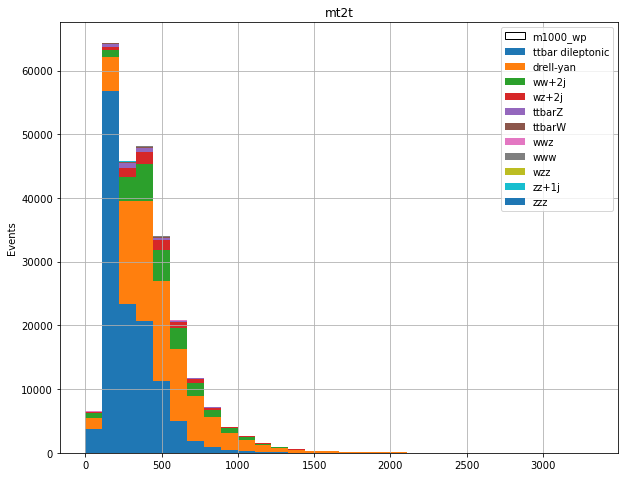

::: nfj_w
df_signal.shape (17930, 3)
ttbar dileptonic 140040 124460.55
drell-yan 110904 88263.15685495628
ww+2j 24387 24648.67392354403
wz+2j 9324 8189.761994710995
ttbarZ 3659 2479.7042999999994
ttbarW 1308 641.0246399999999
wwz 879 219.50387999999998
www 758 256.2797999999999
wzz 359 28.91745
zz+1j 219 163.51410872097975
zzz 166 4.341137142857143
BACK [1.81693912e+06 0.00000000e+00 0.00000000e+00 0.00000000e+00
 0.00000000e+00 0.00000000e+00 0.00000000e+00 6.73675142e+05
 0.00000000e+00 0.00000000e+00 0.00000000e+00 0.00000000e+00
 0.00000000e+00 0.00000000e+00 0.00000000e+00 7.00800431e+04
 0.00000000e+00 0.00000000e+00 0.00000000e+00 0.00000000e+00
 0.00000000e+00 0.00000000e+00 2.09728212e+03 0.00000000e+00
 0.00000000e+00 0.00000000e+00 0.00000000e+00 0.00000000e+00
 0.00000000e+00 7.02682282e+00]


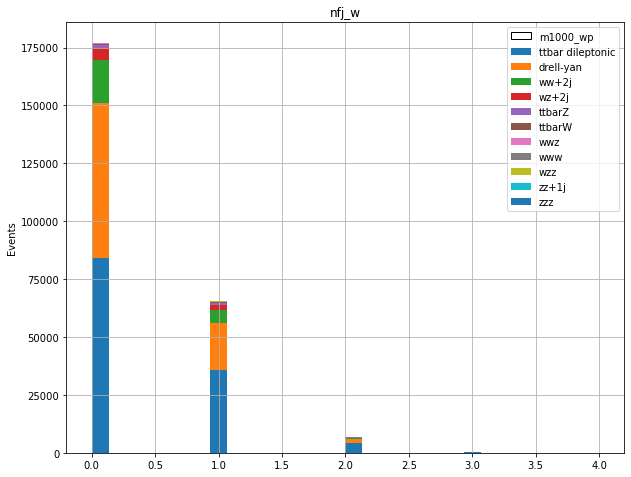

::: hthad_fj
df_signal.shape (17930, 3)
ttbar dileptonic 140040 124460.55
drell-yan 110904 88263.15685495628
ww+2j 24387 24648.67392354403
wz+2j 9324 8189.761994710995
ttbarZ 3659 2479.7042999999994
ttbarW 1308 641.0246399999999
wwz 879 219.50387999999998
www 758 256.2797999999999
wzz 359 28.91745
zz+1j 219 163.51410872097975
zzz 166 4.341137142857143
BACK [1.11893256e+05 3.82593945e+05 3.12301742e+05 5.41527993e+05
 4.60686001e+05 2.96620038e+05 1.86879507e+05 1.10727478e+05
 6.44256470e+04 3.76962120e+04 2.12778945e+04 1.45640676e+04
 7.92332731e+03 4.89135967e+03 3.40394928e+03 1.86142501e+03
 1.17449447e+03 7.85539088e+02 5.18511770e+02 3.34995248e+02
 1.86460087e+02 1.61652835e+02 1.13703210e+02 7.95930312e+01
 7.07028165e+01 2.29438604e+01 1.70550893e+01 3.41101786e+01
 1.59170376e+01 9.09657052e+00]


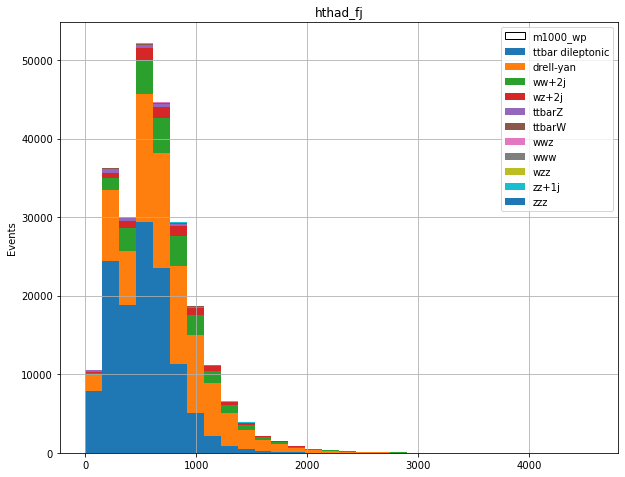

::: mt
df_signal.shape (17930, 3)
ttbar dileptonic 140040 124460.55
drell-yan 110904 88263.15685495628
ww+2j 24387 24648.67392354403
wz+2j 9324 8189.761994710995
ttbarZ 3659 2479.7042999999994
ttbarW 1308 641.0246399999999
wwz 879 219.50387999999998
www 758 256.2797999999999
wzz 359 28.91745
zz+1j 219 163.51410872097975
zzz 166 4.341137142857143
BACK [7.55739038e+05 7.02998940e+05 4.68813475e+05 2.85785337e+05
 1.60184091e+05 8.58685317e+04 4.62370891e+04 2.41477492e+04
 1.23475192e+04 7.16134078e+03 4.35651894e+03 2.80369263e+03
 2.07604728e+03 1.21242029e+03 8.09406615e+02 6.83127965e+02
 4.40470625e+02 3.40789446e+02 1.83577035e+02 1.05736792e+02
 1.19339964e+02 8.60503714e+01 4.46764457e+01 6.02618385e+01
 4.21792457e+01 4.77511128e+01 2.38755564e+01 2.38755564e+01
 3.97925940e+01 1.59170376e+01]


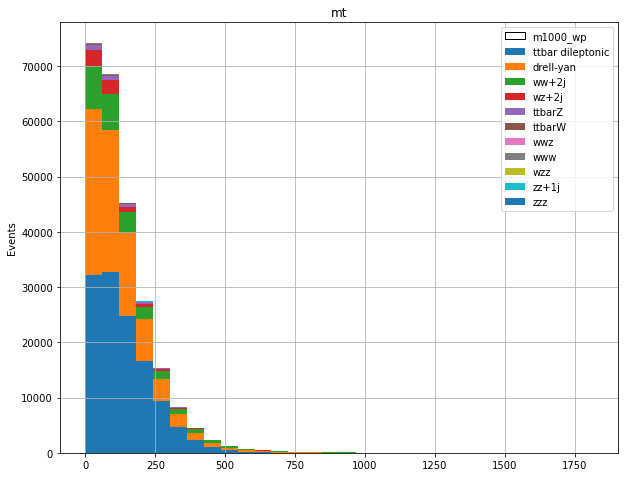

::: met
df_signal.shape (17930, 3)
ttbar dileptonic 140040 124460.55
drell-yan 110904 88263.15685495628
ww+2j 24387 24648.67392354403
wz+2j 9324 8189.761994710995
ttbarZ 3659 2479.7042999999994
ttbarW 1308 641.0246399999999
wwz 879 219.50387999999998
www 758 256.2797999999999
wzz 359 28.91745
zz+1j 219 163.51410872097975
zzz 166 4.341137142857143
BACK [1.06495423e+06 7.09061504e+05 3.70190501e+05 1.91262581e+05
 1.00270499e+05 5.28089655e+04 3.01243396e+04 1.72284644e+04
 1.02622218e+04 6.45934895e+03 3.55210347e+03 1.94386841e+03
 1.56720771e+03 9.83105749e+02 5.95040128e+02 4.87794707e+02
 3.54392975e+02 1.13181780e+02 1.35124411e+02 1.96966337e+02
 6.51389419e+01 4.22750532e+01 1.03451705e+01 7.02682282e+00
 0.00000000e+00 3.43165344e+01 7.02682282e+00 2.52199639e+01
 4.54828526e+01 1.03451705e+01]


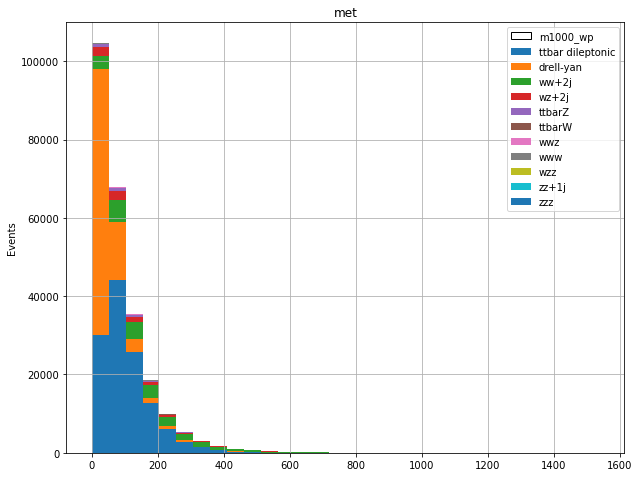

::: htlep
df_signal.shape (17930, 3)
ttbar dileptonic 140040 124460.55
drell-yan 110904 88263.15685495628
ww+2j 24387 24648.67392354403
wz+2j 9324 8189.761994710995
ttbarZ 3659 2479.7042999999994
ttbarW 1308 641.0246399999999
wwz 879 219.50387999999998
www 758 256.2797999999999
wzz 359 28.91745
zz+1j 219 163.51410872097975
zzz 166 4.341137142857143
BACK [5.53311684e+05 8.92305641e+05 4.72505511e+05 2.43868908e+05
 1.44544591e+05 9.94666728e+04 6.57904765e+04 3.77438030e+04
 2.15011285e+04 1.25009088e+04 7.19202261e+03 4.20127561e+03
 2.64155543e+03 1.77161472e+03 1.21406549e+03 7.60452550e+02
 4.53292857e+02 3.14223841e+02 2.78548158e+02 1.19377782e+02
 6.48062021e+01 7.97915437e+01 3.18340752e+01 4.88891645e+01
 3.18340752e+01 2.38755564e+01 7.95851880e+00 0.00000000e+00
 0.00000000e+00 2.38755564e+01]


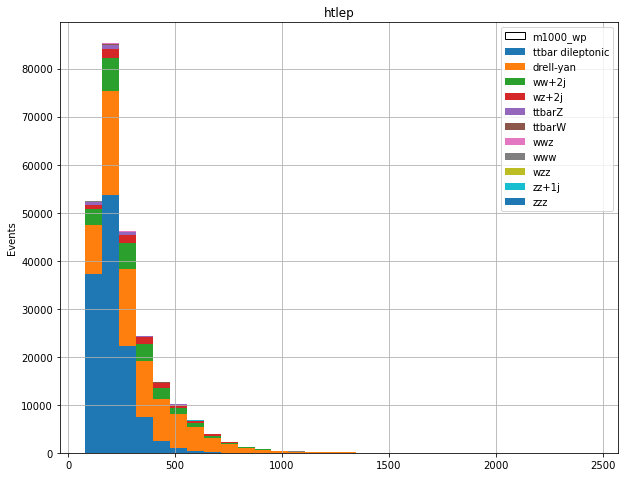

all_signal_m1000_np_bg.csv m1000_np
Index(['mumuSS', 'mumuOS', 'emu', 'ee', 'mll', 'drll', 'drjl1', 'drjl2',
       'drlmet', 'dphi_ll', 'dphi_llmet', 'dphi_fj12', 'dphi_fj13',
       'dphi_fj23', 'met', 'mt', 'mt2t', 'bveto', 'hthad_rj', 'hthad_fj',
       'htlep', 'fj1mass', 'fj2mass', 'fj1pt', 'fj2pt', 'nel', 'nmu', 'nj',
       'nfj', 'nfj_w', 'label', 'weight_column', 'sample'],
      dtype='object')
features ['bveto', 'mt2t', 'nfj_w', 'hthad_fj', 'mt', 'met', 'htlep']
::: bveto
df_signal.shape (19109, 3)
ttbar dileptonic 140040 124460.55
drell-yan 110904 88263.15685495628
ww+2j 24387 24648.67392354403
wz+2j 9324 8189.761994710995
ttbarZ 3659 2479.7042999999994
ttbarW 1308 641.0246399999999
wwz 879 219.50387999999998
www 758 256.2797999999999
wzz 359 28.91745
zz+1j 219 163.51410872097975
zzz 166 4.341137142857143
BACK [1111458.95616698       0.               0.               0.
       0.               0.               0.               0.
       0.               0.               0.

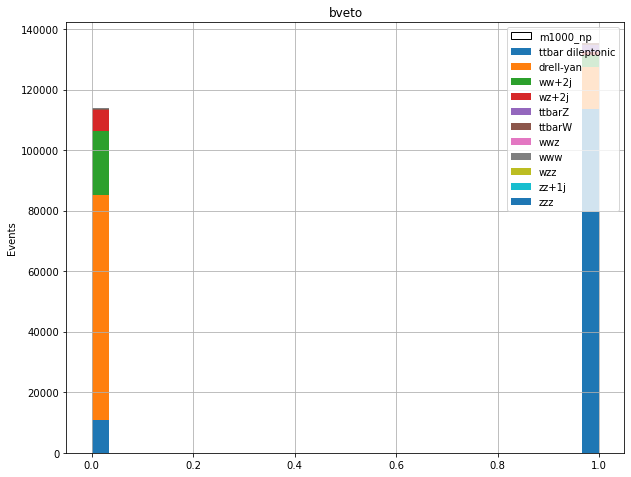

::: mt2t
df_signal.shape (19109, 3)
ttbar dileptonic 140040 124460.55
drell-yan 110904 88263.15685495628
ww+2j 24387 24648.67392354403
wz+2j 9324 8189.761994710995
ttbarZ 3659 2479.7042999999994
ttbarW 1308 641.0246399999999
wwz 879 219.50387999999998
www 758 256.2797999999999
wzz 359 28.91745
zz+1j 219 163.51410872097975
zzz 166 4.341137142857143
BACK [6.72516457e+04 6.96021306e+05 4.70653582e+05 4.89024492e+05
 3.41172397e+05 2.06865583e+05 1.15461670e+05 7.03686211e+04
 4.03041253e+04 2.59584701e+04 1.48004267e+04 9.43782296e+03
 5.17335553e+03 3.43208456e+03 2.60471260e+03 1.36827840e+03
 9.06783681e+02 5.92867806e+02 5.16578382e+02 2.15086363e+02
 2.07127844e+02 1.67128895e+02 7.16266692e+01 1.11427106e+02
 7.95851880e+00 7.95851880e+00 1.59170376e+01 7.95851880e+00
 2.38755564e+01 4.77511128e+01]


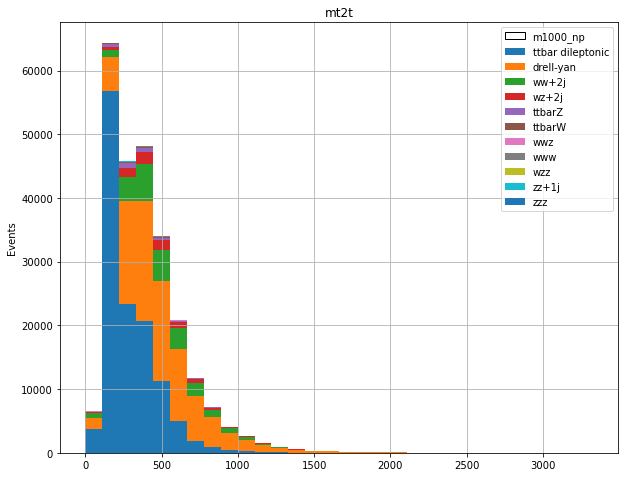

::: nfj_w
df_signal.shape (19109, 3)
ttbar dileptonic 140040 124460.55
drell-yan 110904 88263.15685495628
ww+2j 24387 24648.67392354403
wz+2j 9324 8189.761994710995
ttbarZ 3659 2479.7042999999994
ttbarW 1308 641.0246399999999
wwz 879 219.50387999999998
www 758 256.2797999999999
wzz 359 28.91745
zz+1j 219 163.51410872097975
zzz 166 4.341137142857143
BACK [1.81693912e+06 0.00000000e+00 0.00000000e+00 0.00000000e+00
 0.00000000e+00 0.00000000e+00 0.00000000e+00 6.73675142e+05
 0.00000000e+00 0.00000000e+00 0.00000000e+00 0.00000000e+00
 0.00000000e+00 0.00000000e+00 0.00000000e+00 7.00800431e+04
 0.00000000e+00 0.00000000e+00 0.00000000e+00 0.00000000e+00
 0.00000000e+00 0.00000000e+00 2.09728212e+03 0.00000000e+00
 0.00000000e+00 0.00000000e+00 0.00000000e+00 0.00000000e+00
 0.00000000e+00 7.02682282e+00]


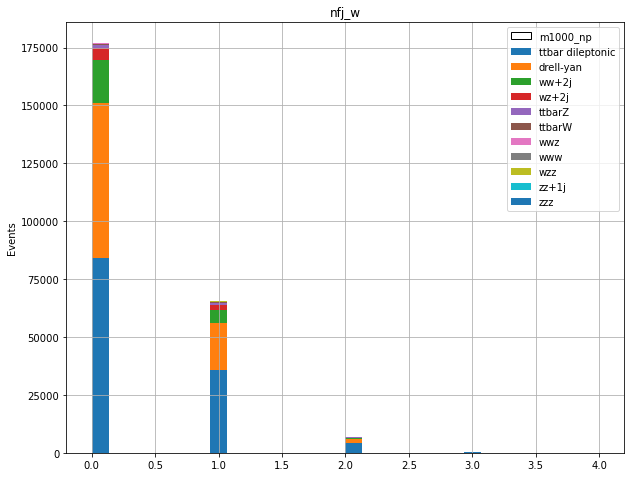

::: hthad_fj
df_signal.shape (19109, 3)
ttbar dileptonic 140040 124460.55
drell-yan 110904 88263.15685495628
ww+2j 24387 24648.67392354403
wz+2j 9324 8189.761994710995
ttbarZ 3659 2479.7042999999994
ttbarW 1308 641.0246399999999
wwz 879 219.50387999999998
www 758 256.2797999999999
wzz 359 28.91745
zz+1j 219 163.51410872097975
zzz 166 4.341137142857143
BACK [1.11893256e+05 3.82593945e+05 3.12301742e+05 5.41527993e+05
 4.60686001e+05 2.96620038e+05 1.86879507e+05 1.10727478e+05
 6.44256470e+04 3.76962120e+04 2.12778945e+04 1.45640676e+04
 7.92332731e+03 4.89135967e+03 3.40394928e+03 1.86142501e+03
 1.17449447e+03 7.85539088e+02 5.18511770e+02 3.34995248e+02
 1.86460087e+02 1.61652835e+02 1.13703210e+02 7.95930312e+01
 7.07028165e+01 2.29438604e+01 1.70550893e+01 3.41101786e+01
 1.59170376e+01 9.09657052e+00]


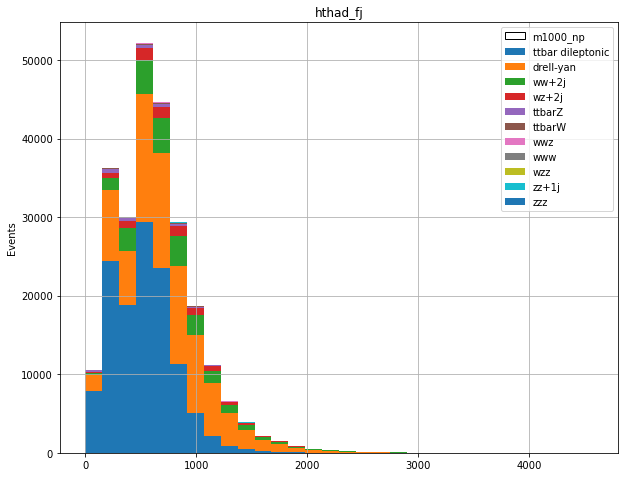

::: mt
df_signal.shape (19109, 3)
ttbar dileptonic 140040 124460.55
drell-yan 110904 88263.15685495628
ww+2j 24387 24648.67392354403
wz+2j 9324 8189.761994710995
ttbarZ 3659 2479.7042999999994
ttbarW 1308 641.0246399999999
wwz 879 219.50387999999998
www 758 256.2797999999999
wzz 359 28.91745
zz+1j 219 163.51410872097975
zzz 166 4.341137142857143
BACK [7.55739038e+05 7.02998940e+05 4.68813475e+05 2.85785337e+05
 1.60184091e+05 8.58685317e+04 4.62370891e+04 2.41477492e+04
 1.23475192e+04 7.16134078e+03 4.35651894e+03 2.80369263e+03
 2.07604728e+03 1.21242029e+03 8.09406615e+02 6.83127965e+02
 4.40470625e+02 3.40789446e+02 1.83577035e+02 1.05736792e+02
 1.19339964e+02 8.60503714e+01 4.46764457e+01 6.02618385e+01
 4.21792457e+01 4.77511128e+01 2.38755564e+01 2.38755564e+01
 3.97925940e+01 1.59170376e+01]


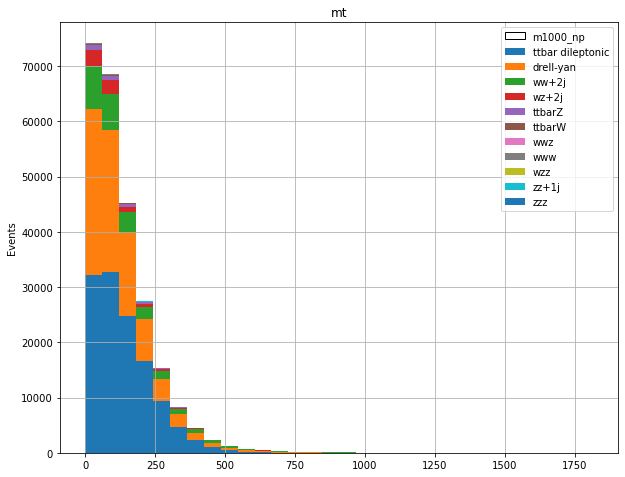

::: met
df_signal.shape (19109, 3)
ttbar dileptonic 140040 124460.55
drell-yan 110904 88263.15685495628
ww+2j 24387 24648.67392354403
wz+2j 9324 8189.761994710995
ttbarZ 3659 2479.7042999999994
ttbarW 1308 641.0246399999999
wwz 879 219.50387999999998
www 758 256.2797999999999
wzz 359 28.91745
zz+1j 219 163.51410872097975
zzz 166 4.341137142857143
BACK [1.06495423e+06 7.09061504e+05 3.70190501e+05 1.91262581e+05
 1.00270499e+05 5.28089655e+04 3.01243396e+04 1.72284644e+04
 1.02622218e+04 6.45934895e+03 3.55210347e+03 1.94386841e+03
 1.56720771e+03 9.83105749e+02 5.95040128e+02 4.87794707e+02
 3.54392975e+02 1.13181780e+02 1.35124411e+02 1.96966337e+02
 6.51389419e+01 4.22750532e+01 1.03451705e+01 7.02682282e+00
 0.00000000e+00 3.43165344e+01 7.02682282e+00 2.52199639e+01
 4.54828526e+01 1.03451705e+01]


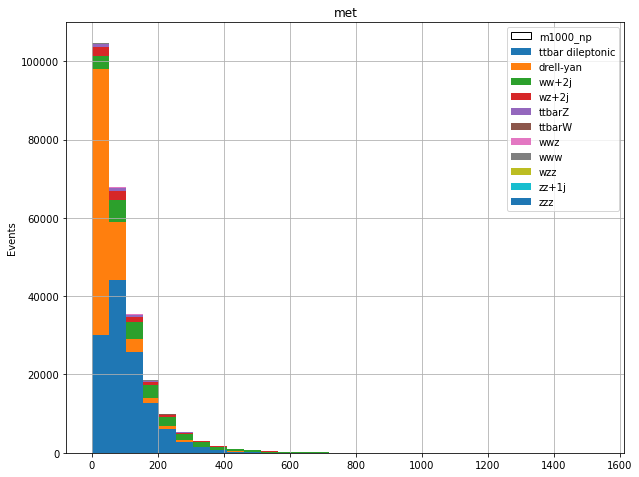

::: htlep
df_signal.shape (19109, 3)
ttbar dileptonic 140040 124460.55
drell-yan 110904 88263.15685495628
ww+2j 24387 24648.67392354403
wz+2j 9324 8189.761994710995
ttbarZ 3659 2479.7042999999994
ttbarW 1308 641.0246399999999
wwz 879 219.50387999999998
www 758 256.2797999999999
wzz 359 28.91745
zz+1j 219 163.51410872097975
zzz 166 4.341137142857143
BACK [5.53311684e+05 8.92305641e+05 4.72505511e+05 2.43868908e+05
 1.44544591e+05 9.94666728e+04 6.57904765e+04 3.77438030e+04
 2.15011285e+04 1.25009088e+04 7.19202261e+03 4.20127561e+03
 2.64155543e+03 1.77161472e+03 1.21406549e+03 7.60452550e+02
 4.53292857e+02 3.14223841e+02 2.78548158e+02 1.19377782e+02
 6.48062021e+01 7.97915437e+01 3.18340752e+01 4.88891645e+01
 3.18340752e+01 2.38755564e+01 7.95851880e+00 0.00000000e+00
 0.00000000e+00 2.38755564e+01]


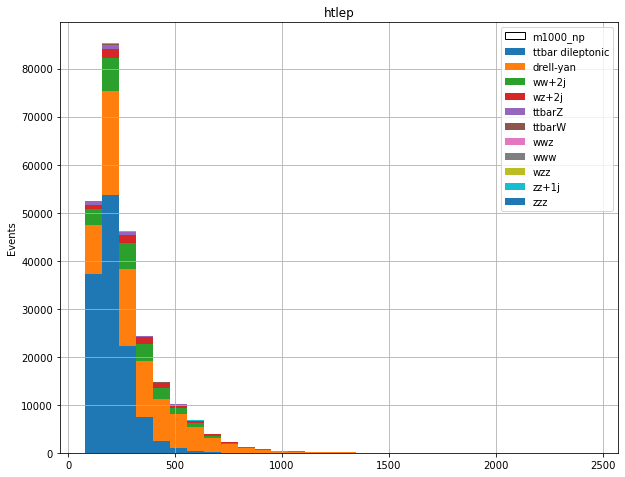

all_signal_m600_np_bg.csv m600_np
Index(['mumuSS', 'mumuOS', 'emu', 'ee', 'mll', 'drll', 'drjl1', 'drjl2',
       'drlmet', 'dphi_ll', 'dphi_llmet', 'dphi_fj12', 'dphi_fj13',
       'dphi_fj23', 'met', 'mt', 'mt2t', 'bveto', 'hthad_rj', 'hthad_fj',
       'htlep', 'fj1mass', 'fj2mass', 'fj1pt', 'fj2pt', 'nel', 'nmu', 'nj',
       'nfj', 'nfj_w', 'label', 'weight_column', 'sample'],
      dtype='object')
features ['bveto', 'mt2t', 'nfj_w', 'hthad_fj', 'mt', 'met', 'htlep']
::: bveto
df_signal.shape (11124, 3)
ttbar dileptonic 140040 124460.55
drell-yan 110904 88263.15685495628
ww+2j 24387 24648.67392354403
wz+2j 9324 8189.761994710995
ttbarZ 3659 2479.7042999999994
ttbarW 1308 641.0246399999999
wwz 879 219.50387999999998
www 758 256.2797999999999
wzz 359 28.91745
zz+1j 219 163.51410872097975
zzz 166 4.341137142857143
BACK [1111458.95616698       0.               0.               0.
       0.               0.               0.               0.
       0.               0.               0.  

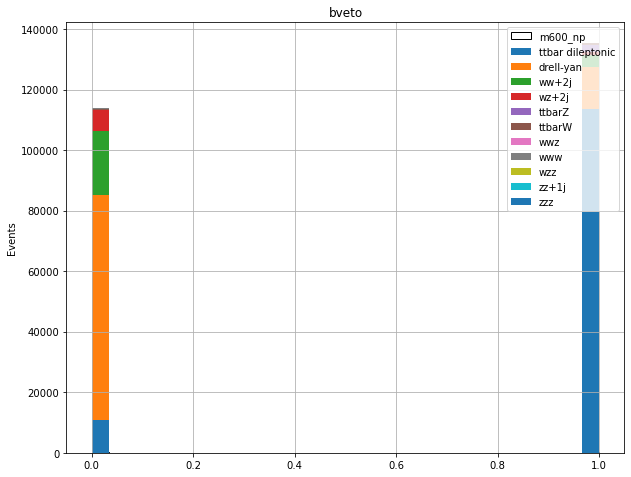

::: mt2t
df_signal.shape (11124, 3)
ttbar dileptonic 140040 124460.55
drell-yan 110904 88263.15685495628
ww+2j 24387 24648.67392354403
wz+2j 9324 8189.761994710995
ttbarZ 3659 2479.7042999999994
ttbarW 1308 641.0246399999999
wwz 879 219.50387999999998
www 758 256.2797999999999
wzz 359 28.91745
zz+1j 219 163.51410872097975
zzz 166 4.341137142857143
BACK [6.72516457e+04 6.96021306e+05 4.70653582e+05 4.89024492e+05
 3.41172397e+05 2.06865583e+05 1.15461670e+05 7.03686211e+04
 4.03041253e+04 2.59584701e+04 1.48004267e+04 9.43782296e+03
 5.17335553e+03 3.43208456e+03 2.60471260e+03 1.36827840e+03
 9.06783681e+02 5.92867806e+02 5.16578382e+02 2.15086363e+02
 2.07127844e+02 1.67128895e+02 7.16266692e+01 1.11427106e+02
 7.95851880e+00 7.95851880e+00 1.59170376e+01 7.95851880e+00
 2.38755564e+01 4.77511128e+01]


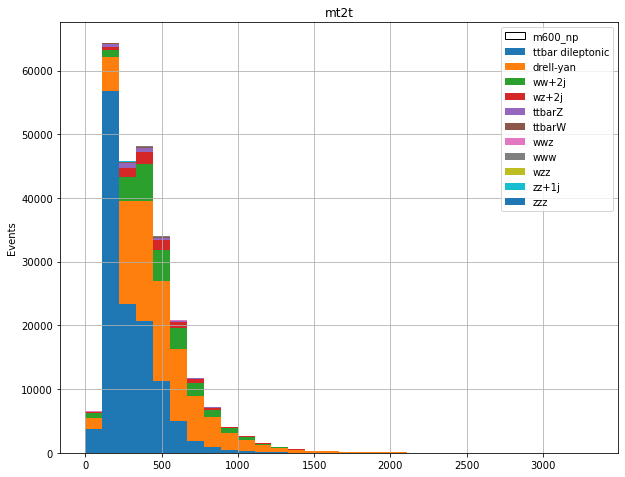

::: nfj_w
df_signal.shape (11124, 3)
ttbar dileptonic 140040 124460.55
drell-yan 110904 88263.15685495628
ww+2j 24387 24648.67392354403
wz+2j 9324 8189.761994710995
ttbarZ 3659 2479.7042999999994
ttbarW 1308 641.0246399999999
wwz 879 219.50387999999998
www 758 256.2797999999999
wzz 359 28.91745
zz+1j 219 163.51410872097975
zzz 166 4.341137142857143
BACK [1.81693912e+06 0.00000000e+00 0.00000000e+00 0.00000000e+00
 0.00000000e+00 0.00000000e+00 0.00000000e+00 6.73675142e+05
 0.00000000e+00 0.00000000e+00 0.00000000e+00 0.00000000e+00
 0.00000000e+00 0.00000000e+00 0.00000000e+00 7.00800431e+04
 0.00000000e+00 0.00000000e+00 0.00000000e+00 0.00000000e+00
 0.00000000e+00 0.00000000e+00 2.09728212e+03 0.00000000e+00
 0.00000000e+00 0.00000000e+00 0.00000000e+00 0.00000000e+00
 0.00000000e+00 7.02682282e+00]


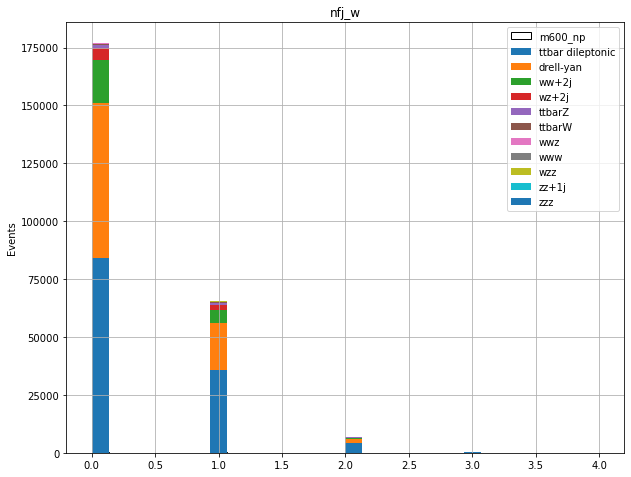

::: hthad_fj
df_signal.shape (11124, 3)
ttbar dileptonic 140040 124460.55
drell-yan 110904 88263.15685495628
ww+2j 24387 24648.67392354403
wz+2j 9324 8189.761994710995
ttbarZ 3659 2479.7042999999994
ttbarW 1308 641.0246399999999
wwz 879 219.50387999999998
www 758 256.2797999999999
wzz 359 28.91745
zz+1j 219 163.51410872097975
zzz 166 4.341137142857143
BACK [1.11893256e+05 3.82593945e+05 3.12301742e+05 5.41527993e+05
 4.60686001e+05 2.96620038e+05 1.86879507e+05 1.10727478e+05
 6.44256470e+04 3.76962120e+04 2.12778945e+04 1.45640676e+04
 7.92332731e+03 4.89135967e+03 3.40394928e+03 1.86142501e+03
 1.17449447e+03 7.85539088e+02 5.18511770e+02 3.34995248e+02
 1.86460087e+02 1.61652835e+02 1.13703210e+02 7.95930312e+01
 7.07028165e+01 2.29438604e+01 1.70550893e+01 3.41101786e+01
 1.59170376e+01 9.09657052e+00]


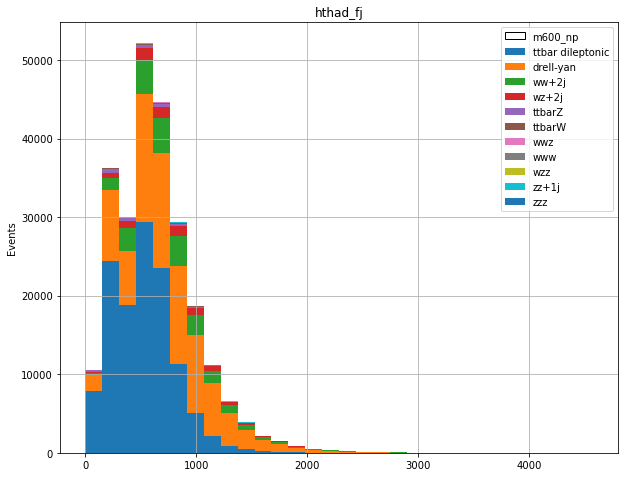

::: mt
df_signal.shape (11124, 3)
ttbar dileptonic 140040 124460.55
drell-yan 110904 88263.15685495628
ww+2j 24387 24648.67392354403
wz+2j 9324 8189.761994710995
ttbarZ 3659 2479.7042999999994
ttbarW 1308 641.0246399999999
wwz 879 219.50387999999998
www 758 256.2797999999999
wzz 359 28.91745
zz+1j 219 163.51410872097975
zzz 166 4.341137142857143
BACK [7.55739038e+05 7.02998940e+05 4.68813475e+05 2.85785337e+05
 1.60184091e+05 8.58685317e+04 4.62370891e+04 2.41477492e+04
 1.23475192e+04 7.16134078e+03 4.35651894e+03 2.80369263e+03
 2.07604728e+03 1.21242029e+03 8.09406615e+02 6.83127965e+02
 4.40470625e+02 3.40789446e+02 1.83577035e+02 1.05736792e+02
 1.19339964e+02 8.60503714e+01 4.46764457e+01 6.02618385e+01
 4.21792457e+01 4.77511128e+01 2.38755564e+01 2.38755564e+01
 3.97925940e+01 1.59170376e+01]


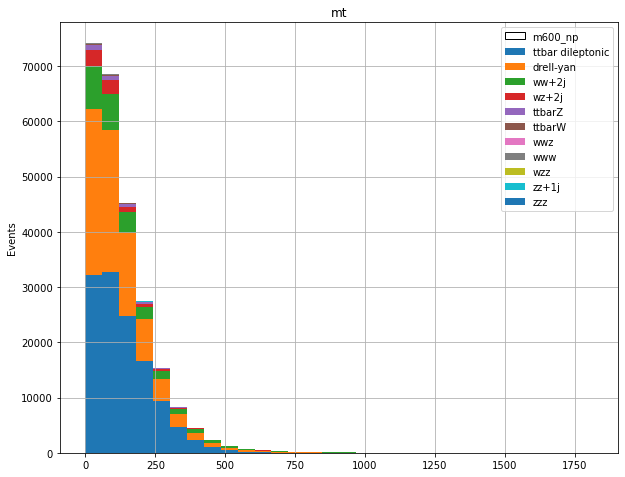

::: met
df_signal.shape (11124, 3)
ttbar dileptonic 140040 124460.55
drell-yan 110904 88263.15685495628
ww+2j 24387 24648.67392354403
wz+2j 9324 8189.761994710995
ttbarZ 3659 2479.7042999999994
ttbarW 1308 641.0246399999999
wwz 879 219.50387999999998
www 758 256.2797999999999
wzz 359 28.91745
zz+1j 219 163.51410872097975
zzz 166 4.341137142857143
BACK [1.06495423e+06 7.09061504e+05 3.70190501e+05 1.91262581e+05
 1.00270499e+05 5.28089655e+04 3.01243396e+04 1.72284644e+04
 1.02622218e+04 6.45934895e+03 3.55210347e+03 1.94386841e+03
 1.56720771e+03 9.83105749e+02 5.95040128e+02 4.87794707e+02
 3.54392975e+02 1.13181780e+02 1.35124411e+02 1.96966337e+02
 6.51389419e+01 4.22750532e+01 1.03451705e+01 7.02682282e+00
 0.00000000e+00 3.43165344e+01 7.02682282e+00 2.52199639e+01
 4.54828526e+01 1.03451705e+01]


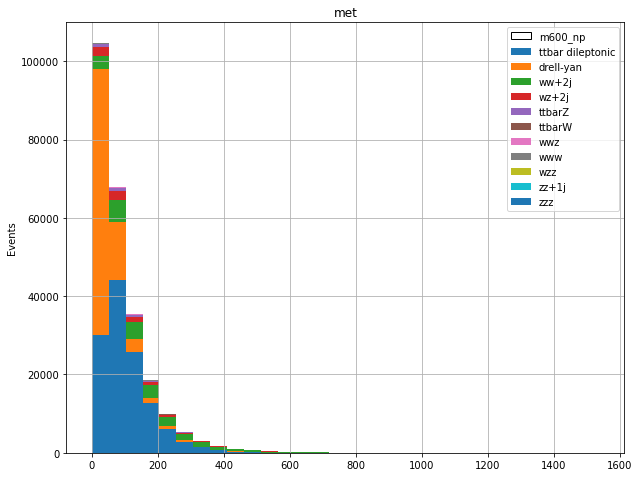

::: htlep
df_signal.shape (11124, 3)
ttbar dileptonic 140040 124460.55
drell-yan 110904 88263.15685495628
ww+2j 24387 24648.67392354403
wz+2j 9324 8189.761994710995
ttbarZ 3659 2479.7042999999994
ttbarW 1308 641.0246399999999
wwz 879 219.50387999999998
www 758 256.2797999999999
wzz 359 28.91745
zz+1j 219 163.51410872097975
zzz 166 4.341137142857143
BACK [5.53311684e+05 8.92305641e+05 4.72505511e+05 2.43868908e+05
 1.44544591e+05 9.94666728e+04 6.57904765e+04 3.77438030e+04
 2.15011285e+04 1.25009088e+04 7.19202261e+03 4.20127561e+03
 2.64155543e+03 1.77161472e+03 1.21406549e+03 7.60452550e+02
 4.53292857e+02 3.14223841e+02 2.78548158e+02 1.19377782e+02
 6.48062021e+01 7.97915437e+01 3.18340752e+01 4.88891645e+01
 3.18340752e+01 2.38755564e+01 7.95851880e+00 0.00000000e+00
 0.00000000e+00 2.38755564e+01]


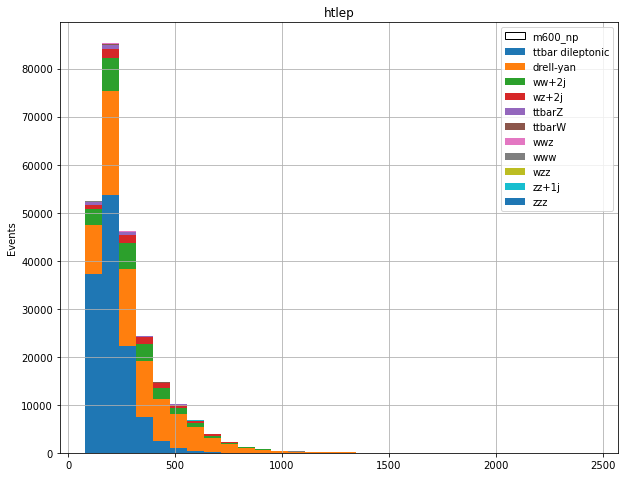

all_signal_m800_wp_bg.csv m800_wp
Index(['mumuSS', 'mumuOS', 'emu', 'ee', 'mll', 'drll', 'drjl1', 'drjl2',
       'drlmet', 'dphi_ll', 'dphi_llmet', 'dphi_fj12', 'dphi_fj13',
       'dphi_fj23', 'met', 'mt', 'mt2t', 'bveto', 'hthad_rj', 'hthad_fj',
       'htlep', 'fj1mass', 'fj2mass', 'fj1pt', 'fj2pt', 'nel', 'nmu', 'nj',
       'nfj', 'nfj_w', 'label', 'weight_column', 'sample'],
      dtype='object')
features ['bveto', 'mt2t', 'nfj_w', 'hthad_fj', 'mt', 'met', 'htlep']
::: bveto
df_signal.shape (14482, 3)
ttbar dileptonic 140040 124460.55
drell-yan 110904 88263.15685495628
ww+2j 24387 24648.67392354403
wz+2j 9324 8189.761994710995
ttbarZ 3659 2479.7042999999994
ttbarW 1308 641.0246399999999
wwz 879 219.50387999999998
www 758 256.2797999999999
wzz 359 28.91745
zz+1j 219 163.51410872097975
zzz 166 4.341137142857143
BACK [1111458.95616698       0.               0.               0.
       0.               0.               0.               0.
       0.               0.               0.  

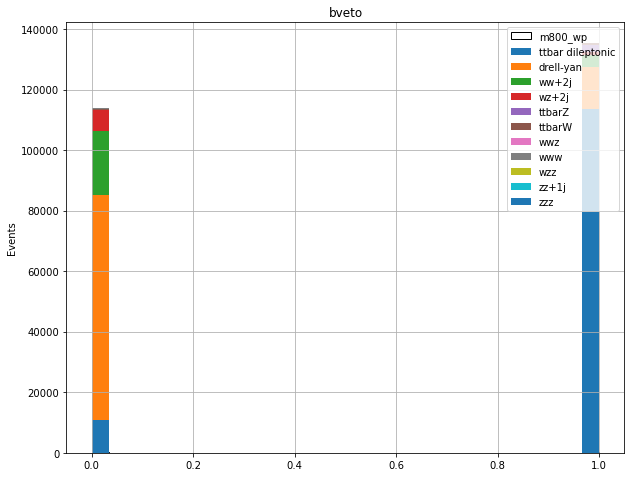

::: mt2t
df_signal.shape (14482, 3)
ttbar dileptonic 140040 124460.55
drell-yan 110904 88263.15685495628
ww+2j 24387 24648.67392354403
wz+2j 9324 8189.761994710995
ttbarZ 3659 2479.7042999999994
ttbarW 1308 641.0246399999999
wwz 879 219.50387999999998
www 758 256.2797999999999
wzz 359 28.91745
zz+1j 219 163.51410872097975
zzz 166 4.341137142857143
BACK [6.72516457e+04 6.96021306e+05 4.70653582e+05 4.89024492e+05
 3.41172397e+05 2.06865583e+05 1.15461670e+05 7.03686211e+04
 4.03041253e+04 2.59584701e+04 1.48004267e+04 9.43782296e+03
 5.17335553e+03 3.43208456e+03 2.60471260e+03 1.36827840e+03
 9.06783681e+02 5.92867806e+02 5.16578382e+02 2.15086363e+02
 2.07127844e+02 1.67128895e+02 7.16266692e+01 1.11427106e+02
 7.95851880e+00 7.95851880e+00 1.59170376e+01 7.95851880e+00
 2.38755564e+01 4.77511128e+01]


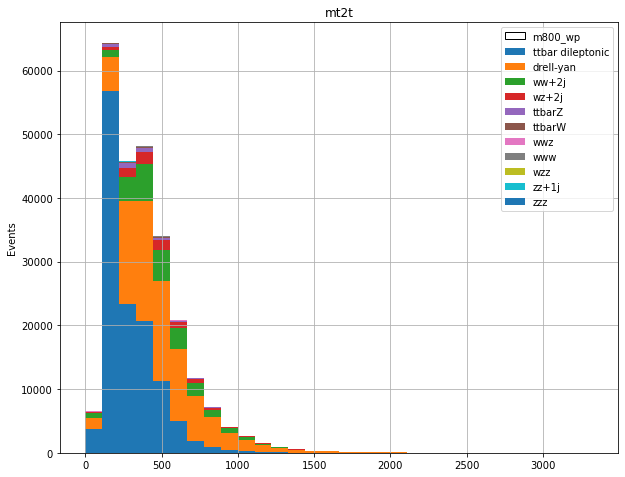

::: nfj_w
df_signal.shape (14482, 3)
ttbar dileptonic 140040 124460.55
drell-yan 110904 88263.15685495628
ww+2j 24387 24648.67392354403
wz+2j 9324 8189.761994710995
ttbarZ 3659 2479.7042999999994
ttbarW 1308 641.0246399999999
wwz 879 219.50387999999998
www 758 256.2797999999999
wzz 359 28.91745
zz+1j 219 163.51410872097975
zzz 166 4.341137142857143
BACK [1.81693912e+06 0.00000000e+00 0.00000000e+00 0.00000000e+00
 0.00000000e+00 0.00000000e+00 0.00000000e+00 6.73675142e+05
 0.00000000e+00 0.00000000e+00 0.00000000e+00 0.00000000e+00
 0.00000000e+00 0.00000000e+00 0.00000000e+00 7.00800431e+04
 0.00000000e+00 0.00000000e+00 0.00000000e+00 0.00000000e+00
 0.00000000e+00 0.00000000e+00 2.09728212e+03 0.00000000e+00
 0.00000000e+00 0.00000000e+00 0.00000000e+00 0.00000000e+00
 0.00000000e+00 7.02682282e+00]


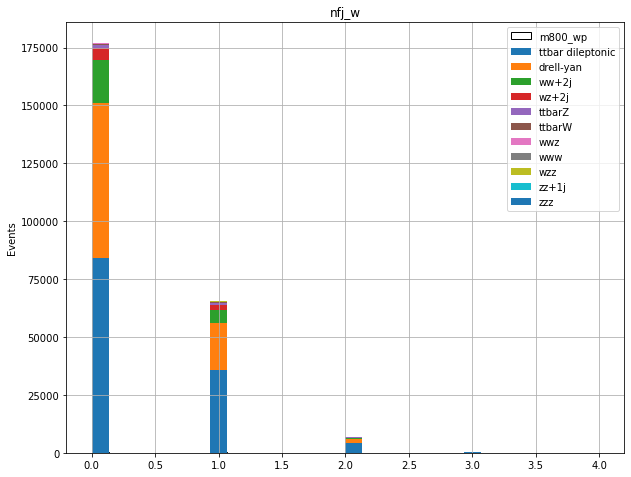

::: hthad_fj
df_signal.shape (14482, 3)
ttbar dileptonic 140040 124460.55
drell-yan 110904 88263.15685495628
ww+2j 24387 24648.67392354403
wz+2j 9324 8189.761994710995
ttbarZ 3659 2479.7042999999994
ttbarW 1308 641.0246399999999
wwz 879 219.50387999999998
www 758 256.2797999999999
wzz 359 28.91745
zz+1j 219 163.51410872097975
zzz 166 4.341137142857143
BACK [1.11893256e+05 3.82593945e+05 3.12301742e+05 5.41527993e+05
 4.60686001e+05 2.96620038e+05 1.86879507e+05 1.10727478e+05
 6.44256470e+04 3.76962120e+04 2.12778945e+04 1.45640676e+04
 7.92332731e+03 4.89135967e+03 3.40394928e+03 1.86142501e+03
 1.17449447e+03 7.85539088e+02 5.18511770e+02 3.34995248e+02
 1.86460087e+02 1.61652835e+02 1.13703210e+02 7.95930312e+01
 7.07028165e+01 2.29438604e+01 1.70550893e+01 3.41101786e+01
 1.59170376e+01 9.09657052e+00]


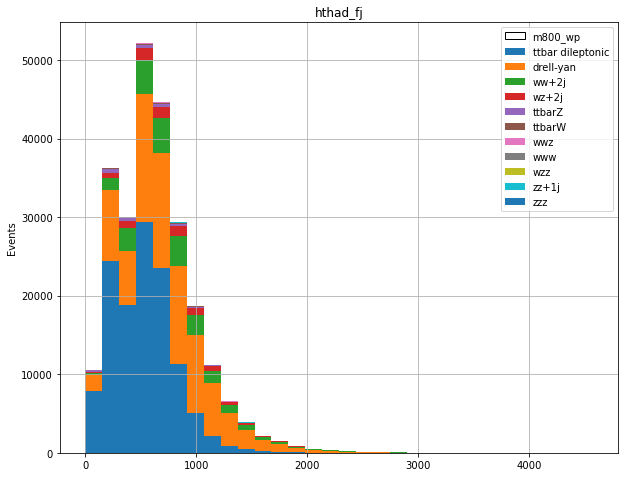

::: mt
df_signal.shape (14482, 3)
ttbar dileptonic 140040 124460.55
drell-yan 110904 88263.15685495628
ww+2j 24387 24648.67392354403
wz+2j 9324 8189.761994710995
ttbarZ 3659 2479.7042999999994
ttbarW 1308 641.0246399999999
wwz 879 219.50387999999998
www 758 256.2797999999999
wzz 359 28.91745
zz+1j 219 163.51410872097975
zzz 166 4.341137142857143
BACK [7.55739038e+05 7.02998940e+05 4.68813475e+05 2.85785337e+05
 1.60184091e+05 8.58685317e+04 4.62370891e+04 2.41477492e+04
 1.23475192e+04 7.16134078e+03 4.35651894e+03 2.80369263e+03
 2.07604728e+03 1.21242029e+03 8.09406615e+02 6.83127965e+02
 4.40470625e+02 3.40789446e+02 1.83577035e+02 1.05736792e+02
 1.19339964e+02 8.60503714e+01 4.46764457e+01 6.02618385e+01
 4.21792457e+01 4.77511128e+01 2.38755564e+01 2.38755564e+01
 3.97925940e+01 1.59170376e+01]


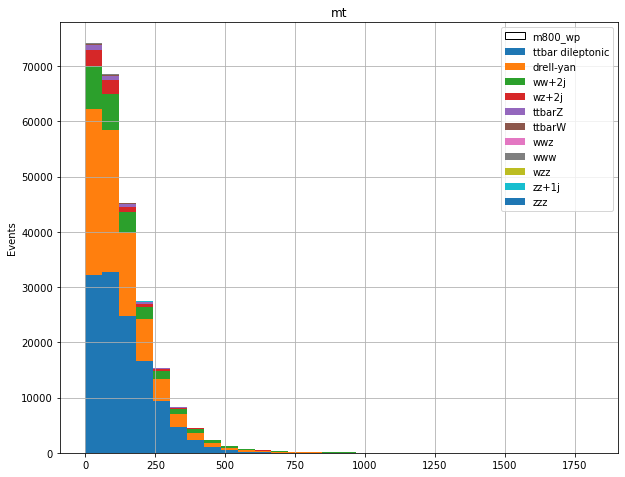

::: met
df_signal.shape (14482, 3)
ttbar dileptonic 140040 124460.55
drell-yan 110904 88263.15685495628
ww+2j 24387 24648.67392354403
wz+2j 9324 8189.761994710995
ttbarZ 3659 2479.7042999999994
ttbarW 1308 641.0246399999999
wwz 879 219.50387999999998
www 758 256.2797999999999
wzz 359 28.91745
zz+1j 219 163.51410872097975
zzz 166 4.341137142857143
BACK [1.06495423e+06 7.09061504e+05 3.70190501e+05 1.91262581e+05
 1.00270499e+05 5.28089655e+04 3.01243396e+04 1.72284644e+04
 1.02622218e+04 6.45934895e+03 3.55210347e+03 1.94386841e+03
 1.56720771e+03 9.83105749e+02 5.95040128e+02 4.87794707e+02
 3.54392975e+02 1.13181780e+02 1.35124411e+02 1.96966337e+02
 6.51389419e+01 4.22750532e+01 1.03451705e+01 7.02682282e+00
 0.00000000e+00 3.43165344e+01 7.02682282e+00 2.52199639e+01
 4.54828526e+01 1.03451705e+01]


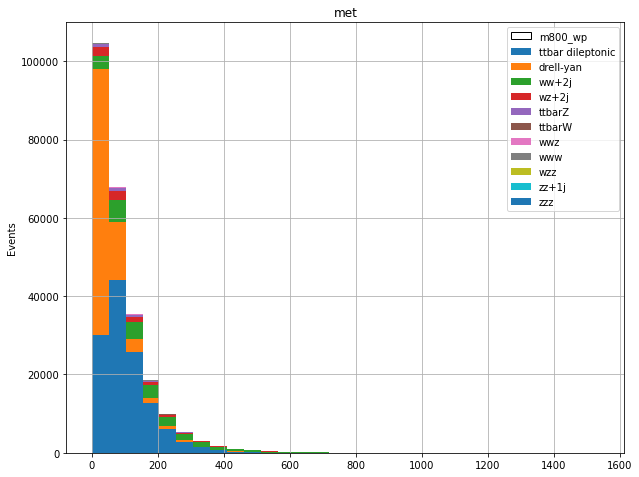

In [ ]:
source_path = "../processed_data/"

for file in glob(source_path + "all_signal*"):
    signal_file = file.split("/")[-1] 
    signal = signal_file.split("_")[2] + "_" + signal_file.split("_")[3]  #   "m1000_np"
    print(signal_file, signal)
    
    df0 = fromcsv2df(source_path + signal_file)
    print(df0.columns)
    df = df0[['bveto', 'mt2t','nfj_w','hthad_fj','mt', 'met', 'htlep','label','weight_column', "sample" ]]
    # data and label matrices


    features = list(df.columns)

    features.remove('label')
    features.remove('weight_column')
    features.remove("sample")
    print("features", features)
    
    for feature in features:
        print(":::",feature)
        df0 = df[['sample',feature,"weight_column"]] # taking only three columns
        df_signal = df0[df0["sample"]==signal] # taking only signal
        signal_weights = df_signal["weight_column"].values
        df0 = df0[df0["sample"]!=signal] #taking only background
        hmin=df0[feature].values.min()
        hmax=df0[feature].values.max()

        print("df_signal.shape", df_signal.shape)
        d = df0["sample"].value_counts()

        stack_list, weights_list, names = get_stacks(d,feature)

        get_histogram( feature, hmin, hmax, stack_list, weights_list, names,
                      df_signal[feature].values,signal_weights, signal, dens=False)